<a href="https://colab.research.google.com/github/zlibutmatthew/Machine-Learning-for-Parkinsons-Prediction/blob/main/Parkinson's_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Parkinson's Disease Data Prediction
####      Done By: Sheanel Gardner & Matthew Zlibut

## Importing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score, confusion_matrix

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu'
                 '/ml/machine-learning-databases/parkinsons'
                 '/parkinsons.data', header=0, 
                 delimiter=r",\s*" ,na_values='?', engine='python')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Check for missing data

In [5]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

## Preprocessing the data

In [6]:
X = df.drop(['name', 'status'], axis =1) # independent variables
y = df['status'] 

In [7]:
x= X.values
y = y.values
print(x)
print(y)

[[1.199920e+02 1.573020e+02 7.499700e+01 ... 2.664820e-01 2.301442e+00
  2.846540e-01]
 [1.224000e+02 1.486500e+02 1.138190e+02 ... 3.355900e-01 2.486855e+00
  3.686740e-01]
 [1.166820e+02 1.311110e+02 1.115550e+02 ... 3.111730e-01 2.342259e+00
  3.326340e-01]
 ...
 [1.746880e+02 2.400050e+02 7.428700e+01 ... 1.584530e-01 2.679772e+00
  1.317280e-01]
 [1.987640e+02 3.969610e+02 7.490400e+01 ... 2.074540e-01 2.138608e+00
  1.233060e-01]
 [2.142890e+02 2.602770e+02 7.797300e+01 ... 1.906670e-01 2.555477e+00
  1.485690e-01]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]


### Find amount of people that have Parkinson's or are healthy

In [10]:
parkinson=0
healthy=0
for item in y:
    if item == 0:
        healthy+=1
    else:
        parkinson+=1
        
print("Parkinson's:",parkinson)
print('Healthy:',healthy)

Parkinson's: 147
Healthy: 48


### Split into training and testing data sets

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(x, y, 
                     test_size=0.25,
                     stratify=y,
                     random_state=1)

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(146, 22) (146,)
(49, 22) (49,)


### Normalize the Data

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
print(X_train_std[:1,:])
print(X_test_std[:1, :])

[[-0.44437902 -0.04151019 -0.80557492 -0.19709269 -0.11549364 -0.16546139
  -0.10530791 -0.16449121 -0.12470514 -0.21396332 -0.105322   -0.02185263
  -0.11972331 -0.10565706 -0.20887264 -0.76455285  1.23687189  0.39803872
   0.08367434 -1.5914534  -1.41841264  0.02737021]]
[[ 2.1079097   0.51759857  2.62701866 -0.87867754 -1.03740581 -0.78998795
  -0.75912201 -0.79017599 -0.83531126 -0.80672698 -0.79897018 -0.74929595
  -0.79519431 -0.79931373 -0.55796024  0.8222732  -0.53658552 -1.47902996
  -1.29037329 -1.54099864 -0.15391542 -1.29379544]]


## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

param_grid = [{'C': np.logspace(-4, 2, 7)}]
lr = LogisticRegression()
gs = GridSearchCV(estimator=lr, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=10,
    n_jobs=-1)
gs.fit(X_train_std, y_train)
print(gs.best_estimator_)
print('Accuracy Training: ', gs.best_score_)
y_pred_train = gs.best_estimator_.predict(X_train_std)
y_pred_test = gs.best_estimator_.predict(X_test_std)
print('Accuracy Test: ', accuracy_score(y_test, y_pred_test))

print('Precision: ', precision_score(y_train, y_pred_train))
print('Recall: ', recall_score(y_train, y_pred_train))
print('F1: ', f1_score(y_train, y_pred_train))

print(' TN, FN,\n FP, TP\n', confusion_matrix(y_train, y_pred_train))
print(' TN, FN,\n FP, TP\n', confusion_matrix(y_test, y_pred_test))

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy training:  0.8366666666666667
accuracy test:  0.8775510204081632
Precision:  0.9043478260869565
recall:  0.9454545454545454
f1:  0.9244444444444444
 TN, FN,
 FP, TP
 [[ 25  11]
 [  6 104]]
 TN, FN,
 FP, TP
 [[10  2]
 [ 4 33]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


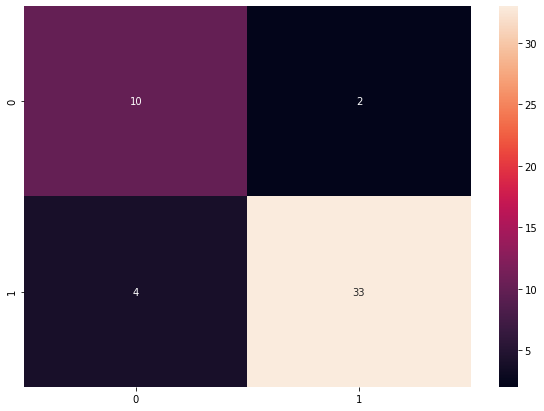

In [16]:
array_test=confusion_matrix(y_test, y_pred_test)
df_cm=pd.DataFrame(array_test)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## Support Vector Machine

In [17]:
C_range = np.logspace(-4, 2, 7)
gamma_range = np.logspace(-4, 2, 7)
param_grid = [{'C': C_range, 'kernel': ['linear']},
    {'C': C_range, 
    'gamma': gamma_range, 
    'kernel': ['rbf']}]

In [18]:
from sklearn.svm import SVC

svc = SVC()
gs = GridSearchCV(estimator=svc, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=10,
    n_jobs=-1)
gs.fit(X_train_std, y_train)
print(gs.best_estimator_)
print('Accuracy Train: ', gs.best_score_)
y_pred_train = gs.best_estimator_.predict(X_train_std)
y_pred_test = gs.best_estimator_.predict(X_test_std)
print('Accuracy Test: ', accuracy_score(y_test, y_pred_test))
print('Precision: ', precision_score(y_train, y_pred_train))
print('Recall: ', recall_score(y_train, y_pred_train))
print('F1: ', f1_score(y_train, y_pred_train))
print(' TN, FN,\n FP, TP\n', confusion_matrix(y_train, y_pred_train))
print(' TN, FN,\n FP, TP\n', confusion_matrix(y_test, y_pred_test))

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy Train:  0.9180952380952382
Accuracy Test:  0.9183673469387755
Precision:  1.0
Recall:  1.0
F1:  1.0
 TN, FN,
 FP, TP
 [[ 36   0]
 [  0 110]]
 TN, FN,
 FP, TP
 [[ 9  3]
 [ 1 36]]


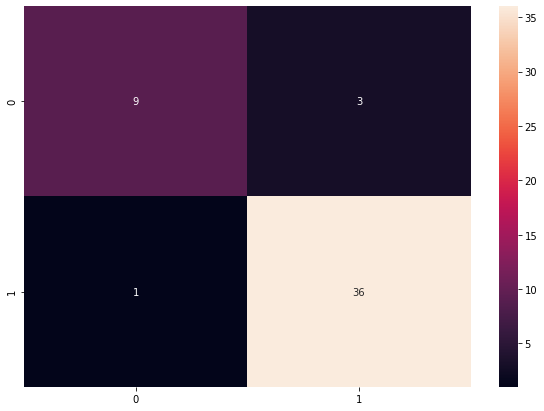

In [19]:
array_test=confusion_matrix(y_test, y_pred_test)
df_cm=pd.DataFrame(array_test)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## Multi-Layer Perceptron Classifier

In [21]:
hls_range = [(8,8), (10,8), (12,8), (20,10), (50,8), (100,50)]
alpha_range = np.logspace(-2,2,5)

param_grid = [{'alpha':alpha_range, 'hidden_layer_sizes':hls_range}]


gs = GridSearchCV(estimator=MLPClassifier(tol=1e-5, 
                                          learning_rate_init=0.02,
                                          max_iter=1000,
                                         random_state=1), 
                  param_grid=param_grid, 
                  cv=5)

gs.fit(X_train_std, y_train)
print(gs.best_estimator_)
print(gs.best_params_)

y_pred_train = gs.best_estimator_.predict(X_train_std)
y_pred_test = gs.best_estimator_.predict(X_test_std)

gs.best_estimator_.fit(X_train_std, y_train)
print("The accuracy for the training data is :", gs.best_estimator_.score(X_train_std,y_train))
print("The accuracy for the test data is :",gs.best_estimator_.score(X_test_std,y_test))
print(' TN, FN,\n FP, TP\n', confusion_matrix(y_train, y_pred_train))
print(' TN, FN,\n FP, TP\n', confusion_matrix(y_test, y_pred_test))

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 8), learning_rate='constant',
              learning_rate_init=0.02, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=1e-05, validation_fraction=0.1, verbose=False,
              warm_start=False)
{'alpha': 0.01, 'hidden_layer_sizes': (10, 8)}
The accuracy for the training data is : 1.0
The accuracy for the test data is : 0.9183673469387755
 TN, FN,
 FP, TP
 [[ 36   0]
 [  0 110]]
 TN, FN,
 FP, TP
 [[ 9  3]
 [ 1 36]]


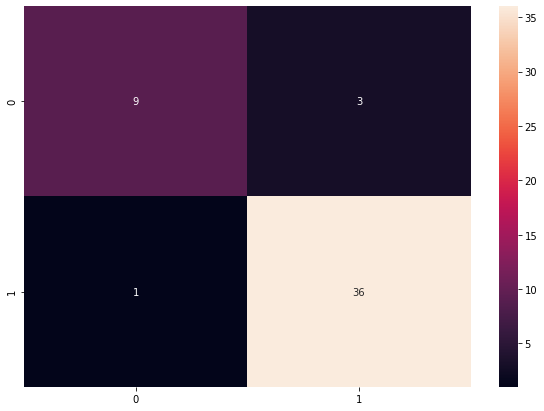

In [22]:
array_test=confusion_matrix(y_test, y_pred_test)
df_cm=pd.DataFrame(array_test)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)